In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-14 19:12:14.405703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 19:12:14.523237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 19:12:14.523255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 19:12:14.547117: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 19:12:15.033636: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_type"
for pooling in [layers.MaxPooling2D, layers.AveragePooling2D]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        pooling(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        pooling(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(pooling.__class__.__name__)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

2022-11-14 19:12:15.749802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 19:12:15.749823: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 19:12:15.749837: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-14 19:12:15.750057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n              type filters kernel_size activation pool_size strides
 1  0            Conv2D      32      (3, 3)       relu                  
 2  1  AveragePooling2D                                   (2, 2)  (1, 1)
 3  2            Conv2D      64      (3, 3)       relu                  
 4  3  AveragePooling2D                                   (2, 2)  (1, 1)]

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [5]:
batch_size = 128
epochs = 10
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/10
422/422 [==============================] - 50s 117ms/step - loss: 0.1529 - accuracy: 0.9542 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 2/10
422/422 [==============================] - 48s 113ms/step - loss: 0.0476 - accuracy: 0.9859 - val_loss: 0.0460 - val_accuracy: 0.9868
Epoch 3/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 4/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0353 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0529 - val_accuracy: 0.9875
Epoch 7/10
422/422 [==============================] - 49s 115ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0361 - val_ac

 50%|█████     | 1/2 [07:41<07:41, 461.08s/it]

Epoch 1/10
422/422 [==============================] - 34s 79ms/step - loss: 0.1733 - accuracy: 0.9472 - val_loss: 0.0636 - val_accuracy: 0.9842
Epoch 2/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0466 - val_accuracy: 0.9868
Epoch 3/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0457 - val_accuracy: 0.9885
Epoch 4/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9875
Epoch 5/10
422/422 [==============================] - 33s 79ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 6/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0433 - val_accuracy: 0.9895
Epoch 7/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0338 - val_accuracy:

100%|██████████| 2/2 [13:12<00:00, 396.37s/it]


In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)

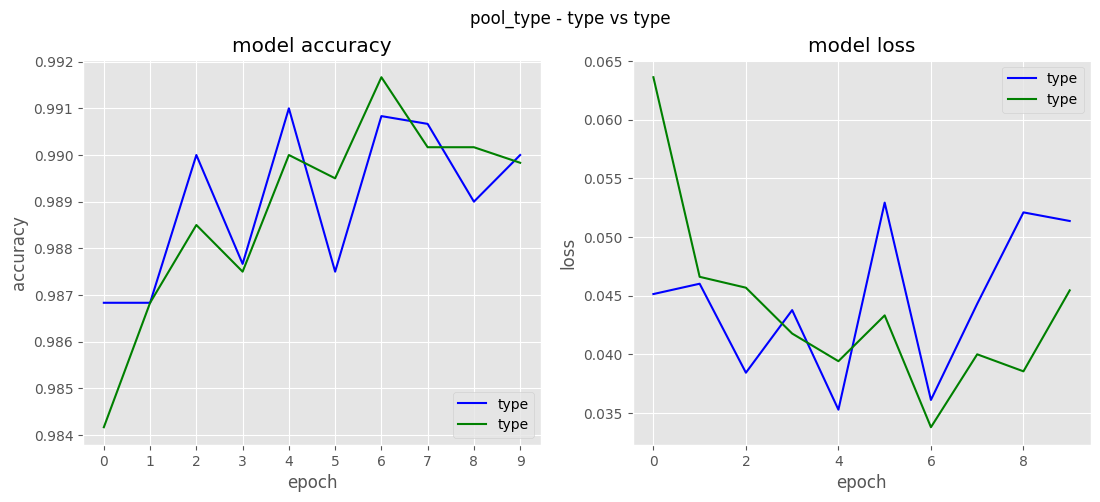

In [7]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)